In [28]:
import pandas as pd


In [29]:
pd.set_option("display.precision", 3)
#read data
df = pd.read_csv('./data/census_adult_income.csv')

In [30]:
#quick visual inspection
print(df.head(5))
print(df.shape)
print(df.describe())
data_types = df.dtypes
print(data_types)

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  target  
0          2174             0              40   United-States   <=50

In [32]:
#check distribution of target variable
class_counts = df.groupby('target').size()
print(class_counts)

target
<=50K    24720
>50K      7841
dtype: int64


In [33]:
#generic way to extract number types

numeric_data = df.select_dtypes(include=['number'])
#skewness = numeric_data.skew()
#print(skewness)
print(numeric_data)


       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32561 rows x 6 columns]


In [34]:
#implement with onyl numeric 
skew2 = df.skew(numeric_only=True)
print(skew2)

age                0.559
fnlwgt             1.447
education-num     -0.312
capital-gain      11.954
capital-loss       4.595
hours-per-week     0.228
dtype: float64


In [35]:
#implement with onyl numeric 
correlations = df.corr(method='pearson', numeric_only=True)
print(correlations)

                  age     fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000 -7.665e-02          0.037     7.767e-02         0.058   
fnlwgt         -0.077  1.000e+00         -0.043     4.319e-04        -0.010   
education-num   0.037 -4.319e-02          1.000     1.226e-01         0.080   
capital-gain    0.078  4.319e-04          0.123     1.000e+00        -0.032   
capital-loss    0.058 -1.025e-02          0.080    -3.162e-02         1.000   
hours-per-week  0.069 -1.877e-02          0.148     7.841e-02         0.054   

                hours-per-week  
age                      0.069  
fnlwgt                  -0.019  
education-num            0.148  
capital-gain             0.078  
capital-loss             0.054  
hours-per-week           1.000  


In [36]:
# #extract numeric columns
# # Create a list of the columns with numeric data
filter_names = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# # Select the columns
numeric_features = df[filter_names]

In [37]:
skew = numeric_features.skew()

print(skew)

age                0.559
fnlwgt             1.447
education-num     -0.312
capital-gain      11.954
capital-loss       4.595
hours-per-week     0.228
dtype: float64


In [38]:
correlations = numeric_features.corr(method='pearson')
print(correlations)

                  age     fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000 -7.665e-02          0.037     7.767e-02         0.058   
fnlwgt         -0.077  1.000e+00         -0.043     4.319e-04        -0.010   
education-num   0.037 -4.319e-02          1.000     1.226e-01         0.080   
capital-gain    0.078  4.319e-04          0.123     1.000e+00        -0.032   
capital-loss    0.058 -1.025e-02          0.080    -3.162e-02         1.000   
hours-per-week  0.069 -1.877e-02          0.148     7.841e-02         0.054   

                hours-per-week  
age                      0.069  
fnlwgt                  -0.019  
education-num            0.148  
capital-gain             0.078  
capital-loss             0.054  
hours-per-week           1.000  


In [39]:
from sklearn.preprocessing import StandardScaler

array = numeric_features.values

# Standardise data (0 mean, 1 stdev)
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

print(array)
print(rescaledX)


[[    39  77516     13   2174      0     40]
 [    50  83311     13      0      0     13]
 [    38 215646      9      0      0     40]
 ...
 [    58 151910      9      0      0     40]
 [    22 201490      9      0      0     20]
 [    52 287927      9  15024      0     40]]
[[ 0.03067056 -1.06361075  1.13473876  0.1484529  -0.21665953 -0.03542945]
 [ 0.83710898 -1.008707    1.13473876 -0.14592048 -0.21665953 -2.22215312]
 [-0.04264203  0.2450785  -0.42005962 -0.14592048 -0.21665953 -0.03542945]
 ...
 [ 1.42360965 -0.35877741 -0.42005962 -0.14592048 -0.21665953 -0.03542945]
 [-1.21564337  0.11095988 -0.42005962 -0.14592048 -0.21665953 -1.65522476]
 [ 0.98373415  0.92989258 -0.42005962  1.88842434 -0.21665953 -0.03542945]]


In [ ]:
scaler = StandardScaler().fit(numeric_features)
rescaledX = scaler.transform(numeric_features)

print(rescaledX)

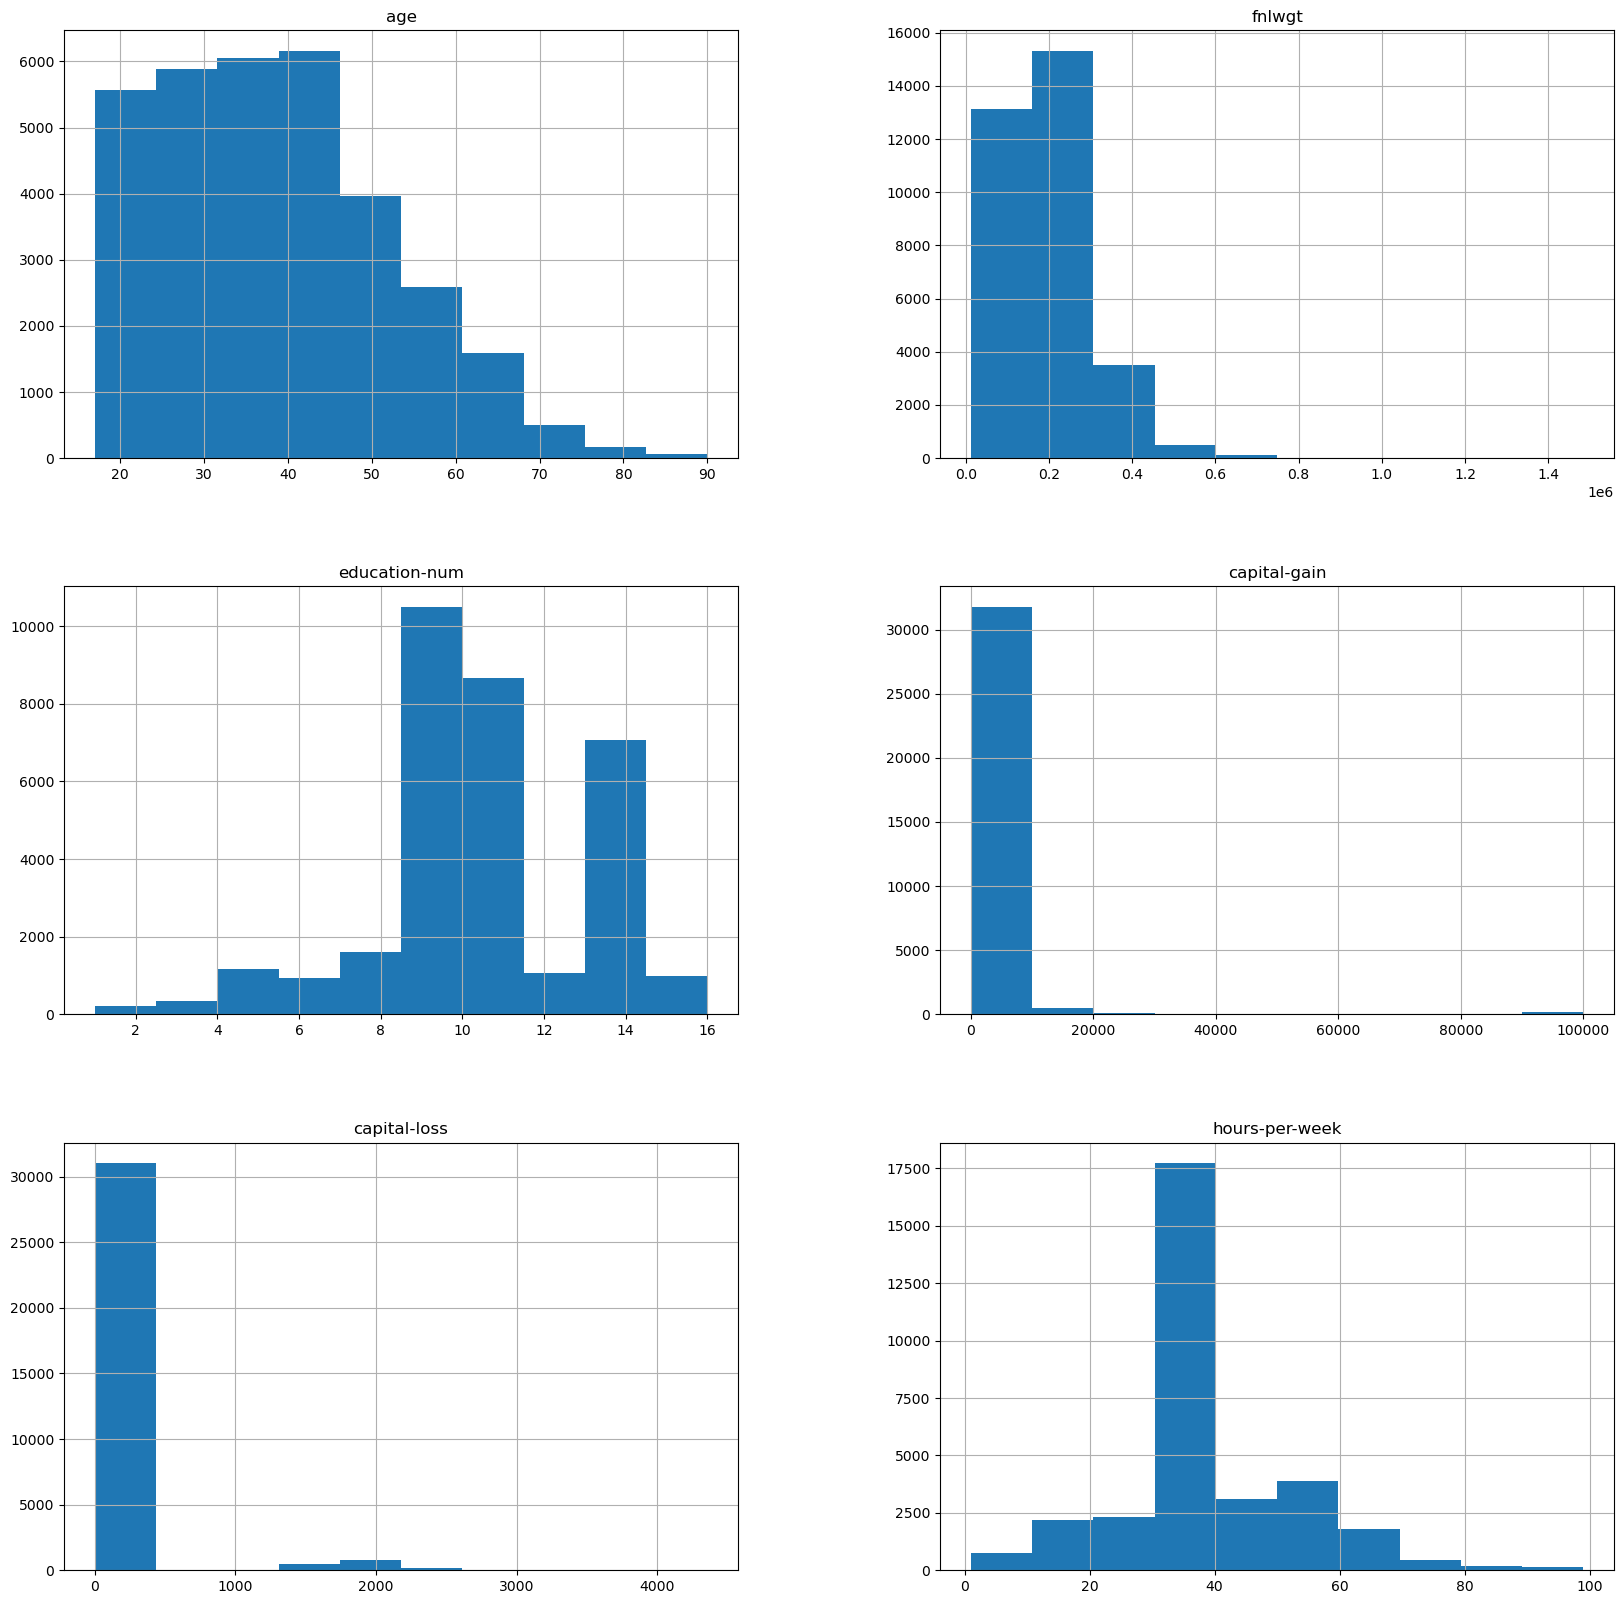

In [40]:
# Univariate Histograms
import matplotlib.pyplot as pyplot
df.hist(figsize=[20, 20])
pyplot.show()

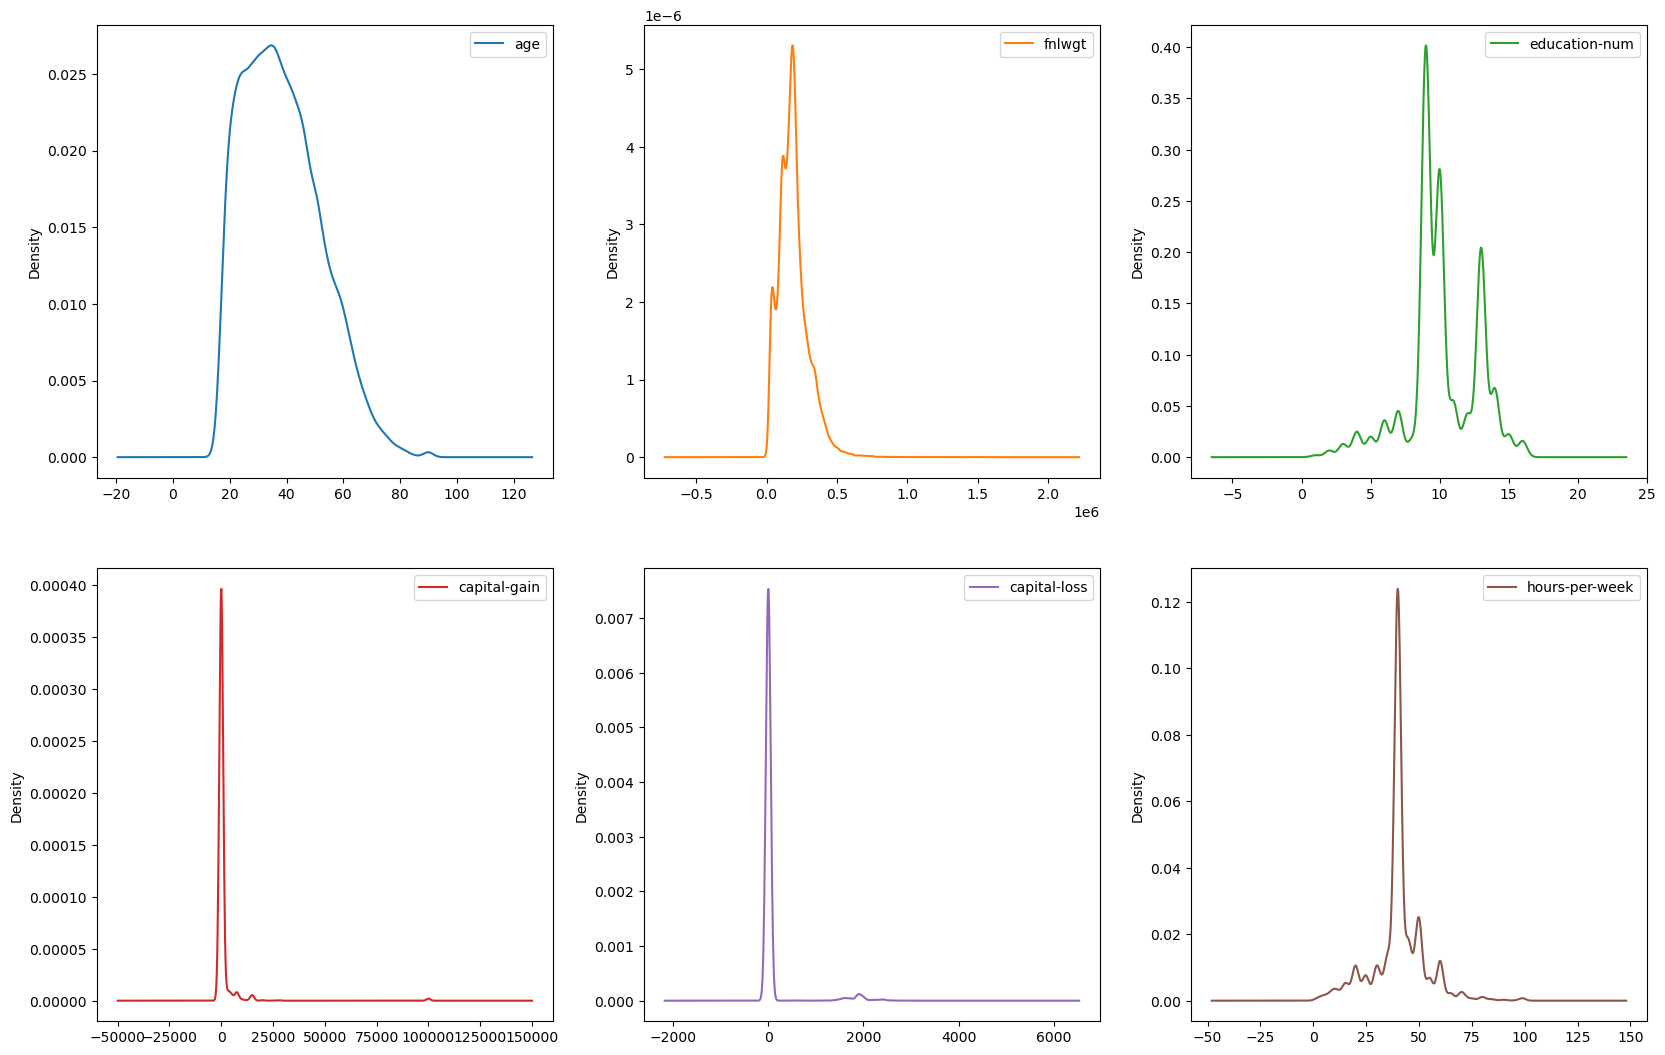

In [43]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=[20, 20]) 
pyplot.show()

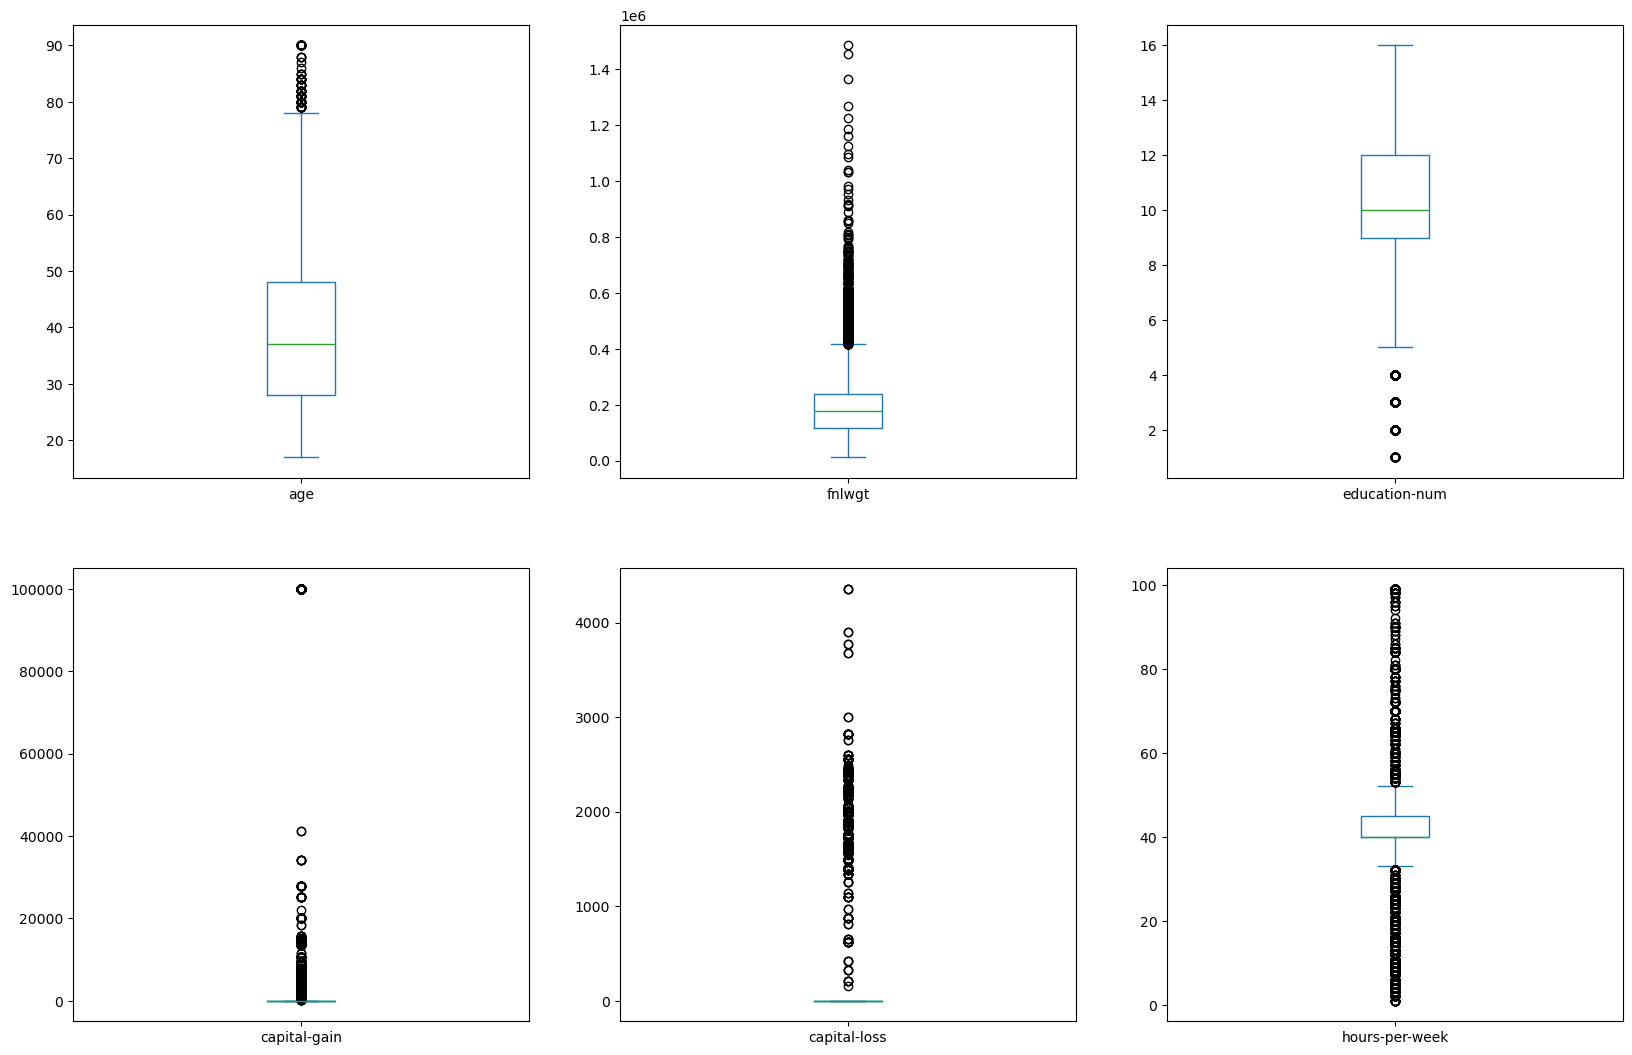

In [44]:
# Box and Whisker Plots
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=[20, 20]) 
pyplot.show()

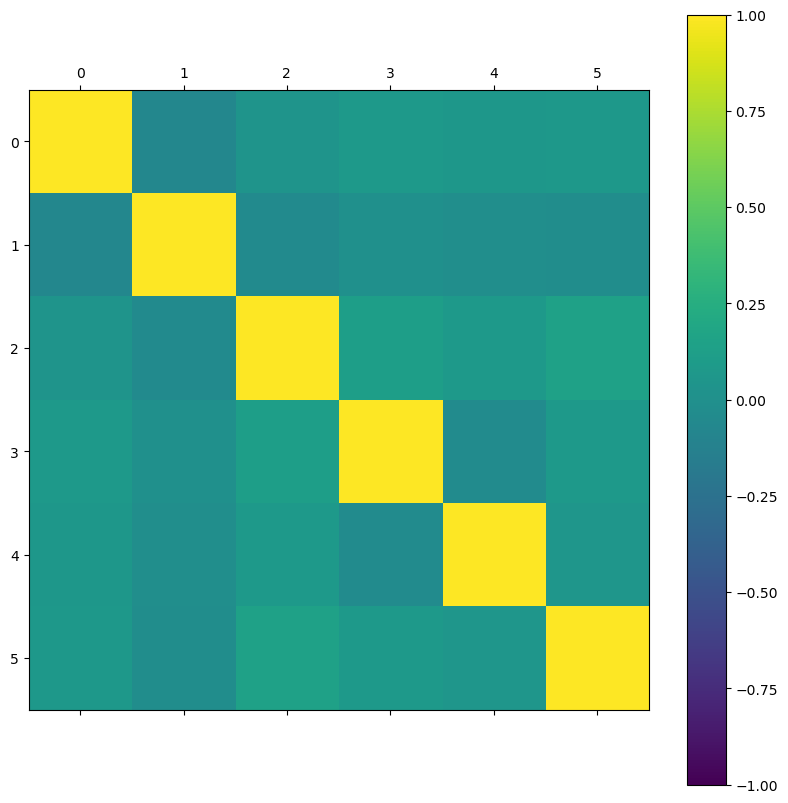

In [45]:
# Correlation Matrix Plot (generic)

# Plot correlation matrix
fig = pyplot.figure(figsize=[10, 10])

ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

pyplot.show()

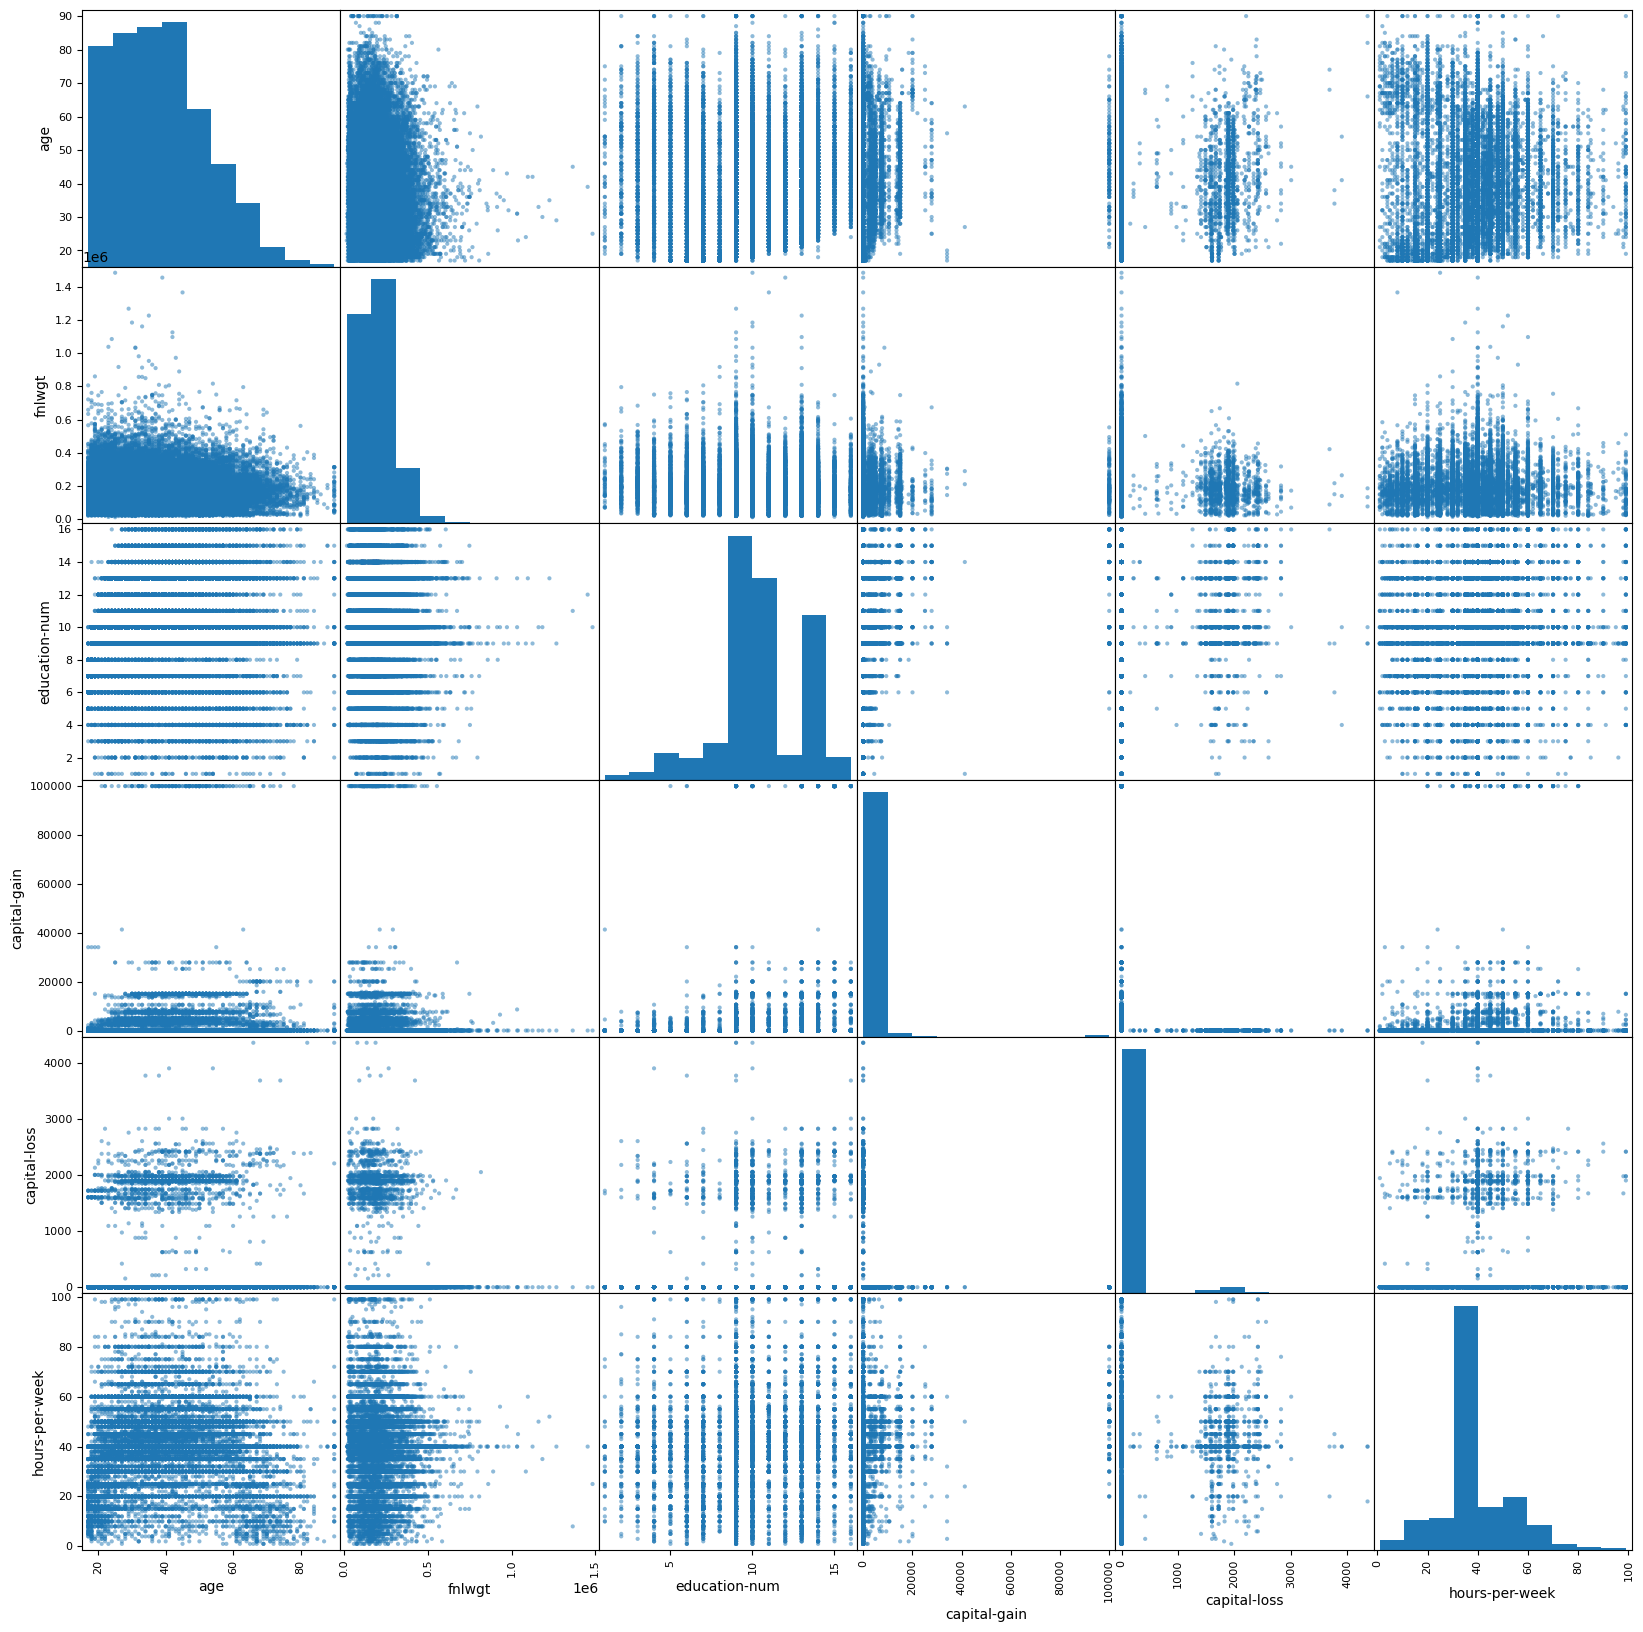

In [47]:
# Scatterplot Matrix using Pandas

pd.plotting.scatter_matrix(df, figsize=[20, 20])

pyplot.show()

In [49]:
# Prepare the data for rescaling and some of the other transforms we will perform later.

# We have loaded the data previously, so now we extract the values from the Pandas dataframe we set up at the beginning.
array = df.values

# separate array into input and output components
X = array[:,0:13]
Y = array[:,14]

print(array)
print(X)
print(Y)


[[39 ' State-gov' 77516 ... 40 ' United-States' ' <=50K']
 [50 ' Self-emp-not-inc' 83311 ... 13 ' United-States' ' <=50K']
 [38 ' Private' 215646 ... 40 ' United-States' ' <=50K']
 ...
 [58 ' Private' 151910 ... 40 ' United-States' ' <=50K']
 [22 ' Private' 201490 ... 20 ' United-States' ' <=50K']
 [52 ' Self-emp-inc' 287927 ... 40 ' United-States' ' >50K']]
[[39 ' State-gov' 77516 ... 2174 0 40]
 [50 ' Self-emp-not-inc' 83311 ... 0 0 13]
 [38 ' Private' 215646 ... 0 0 40]
 ...
 [58 ' Private' 151910 ... 0 0 40]
 [22 ' Private' 201490 ... 0 0 20]
 [52 ' Self-emp-inc' 287927 ... 15024 0 40]]
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']


ValueError: could not convert string to float: ' State-gov'